<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ho_ten  77 non-null     object 
 1   10%     77 non-null     float64
 2   20%     77 non-null     float64
 3   20%.1   77 non-null     float64
 4   thi     77 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.1+ KB
Nulls
=====
10%      0
20%      0
20%.1    0
thi      0
dtype: int64
0s
==
10%      1
20%      3
20%.1    3
thi      3
dtype: int64
            10%       20%     20%.1       thi
10%    1.000000  0.621817  0.517717  0.504732
20%    0.621817  1.000000  0.875314  0.852514
20%.1  0.517717  0.875314  1.000000  0.954001
thi    0.504732  0.852514  0.954001  1.000000
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                48        
     

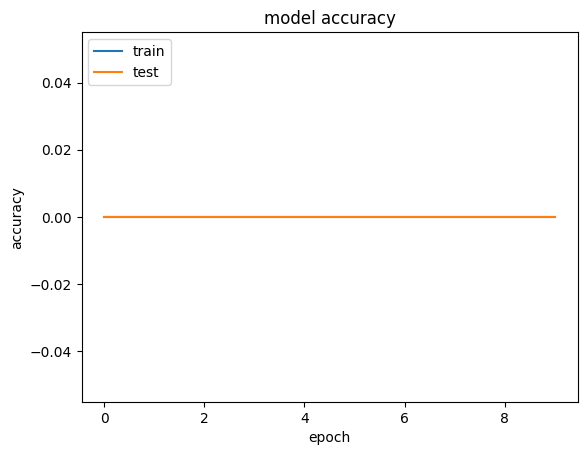

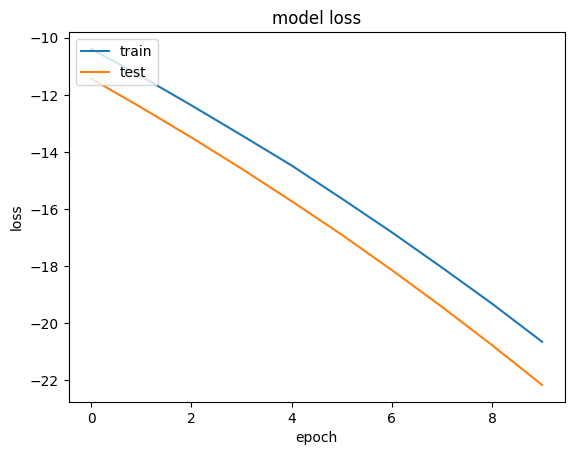

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('diemthi.csv')
df.info()

df = df.drop(labels='ho_ten', axis=1)
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())


#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

corr = df.corr()
print(corr)

X = df[['10%','20%','20%.1']]
y = df.iloc[:,3]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"]) 

history=model.fit(X_train, y_train,epochs=10,batch_size=10,validation_split=0.3, verbose=0)
print(history.history.keys())
y_pred = model.predict(X_test)
print(y_pred.size)
# =============================================================================
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))
# =============================================================================


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






